
<div align="center">
    <img src="image/foto_portada.jpg" alt="Tres personas catando vinos." style="width: 600px; height: 300px; border-radius: 10px;">
    <h1 style="font-family: Arial, sans-serif; font-size: 32px; font-weight: bold; margin-top: 20px; text-align: center;">Explorando la calidad del vino</h1>
    <h2 style="font-family: Arial, sans-serif; font-size: 20px; font-weight: normal; text-align: center;">Una aproximación a través de técnicas de procesamiento de datos</h2>
</div>


<br>El objetivo de este trabajo es establecer, por medio de técnicas de procesamiento de datos, las variables más influyentes en la calidad sensorial del vino.<br> 
Se analiza una variable dependiente (calidad) y diez variables independientes: acidez volátil, ácido cítrico, azúcar residual, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos, y alcohol.<br>
Utilizaremos dos datasets enfocados en la calidad de vinos. Ambos se relacionan a las variantes de vino blanco y vino tinto del vino portugués "Vinho Verde".
Los conjuntos de datos utilizados en este proyecto son provenientes del Machine Learning Repository de UCI. Si deseas obtener más información acerca de estos conjuntos de datos, puedes consultar el siguiente enlace: [UCI Wine Quality Dataset](https://archive.ics.uci.edu/dataset/186/wine+quality).

 # 1. Data  wrangling

## 1.1 Importacion de datos

In [21]:
import pandas as pd

In [22]:
#tablas a importar
tablas = ['winequality-red.csv',
          'winequality-white.csv']

archivos = []

ruta_data = 'data'  # Ruta relativa a la carpeta "data"

#Importar los archivos CSV y guardarlos en una lista
for t in tablas:
    ruta_archivo = f'{ruta_data}/{t}'
    datos = pd.read_csv(ruta_archivo,
                        sep = ';',
                        encoding='latin-1',
                        low_memory=False)
    archivos.append(datos)

#Desempaquetado de archivos importados
vino_tinto,vino_blanco = archivos[:2]

## 1.2 Descubrimiento de datos

In [23]:
# Cuántas filas y columnas tienen los conjuntos de datos
print("Información sobre las filas y columnas de los conjuntos de datos:")
print(f"--> Vino tinto\nFilas: {vino_tinto.shape[0]}\nColumnas: {vino_tinto.shape[1]}")
print("----------------------")
print(f"--> Vino blanco\nFilas: {vino_blanco.shape[0]}\nColumnas: {vino_blanco.shape[1]}")

Información sobre las filas y columnas de los conjuntos de datos:
--> Vino tinto
Filas: 1599
Columnas: 12
----------------------
--> Vino blanco
Filas: 4898
Columnas: 12


In [24]:
#primeros diez registros data set tinto
vino_tinto.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5
6,7.9,0.60,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7
9,7.5,0.50,0.36,6.1,0.071,17.0,102.0,0.9978,3.35,0.80,10.5,5


In [25]:
#primeros diez registros data set blanco
vino_blanco.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


In [26]:
# Resumen del dataset de vino tinto
vino_tinto.info()
vino_tinto.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [27]:
# Resumen del dataset de vino blanco
vino_blanco.info()
vino_blanco.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


## 1.3 Eliminación de duplicados

In [28]:
# Función para verificar y eliminar duplicados en un dataset
def verificar_duplicados(dataset_nombre, dataset):
    print(f"Análisis de duplicados en el conjunto de datos {dataset_nombre.upper()}:")
   
    duplicados = dataset.duplicated().any()
    print(f"¿Hay duplicados? {duplicados}")
    
    cantidad_duplicados = dataset.duplicated().sum()
    print(f"Cantidad de duplicados: {cantidad_duplicados}")
    
    dataset = dataset.drop_duplicates()
    
    duplicados_despues = dataset.duplicated().any()
    print(f"¿Hay duplicados después de eliminarlos? {duplicados_despues}")
    
    print()  # Salto de línea
    
    return dataset

# Uso de la función para el conjunto de vino tinto
vino_tinto = verificar_duplicados("vino tinto", vino_tinto)

# Uso de la función para el conjunto de vino blanco
vino_blanco = verificar_duplicados("vino blanco", vino_blanco)

Análisis de duplicados en el conjunto de datos VINO TINTO:
¿Hay duplicados? True
Cantidad de duplicados: 240
¿Hay duplicados después de eliminarlos? False

Análisis de duplicados en el conjunto de datos VINO BLANCO:
¿Hay duplicados? True
Cantidad de duplicados: 937
¿Hay duplicados después de eliminarlos? False



## 1.4  Transformacion y consolidacion de los datos

In [29]:
# Agrego nueva columna "categoria"
# Se asigna el valor "rojo" a todos los registros en el DataFrame vino_tinto y ...
# ... el valor "blanco" a todos los registros en el DataFrame vino_blanco

vino_tinto.loc[:,"categoria"] = "rojo"
vino_blanco.loc[:,"categoria"] = "blanco"

# Concatenación de los conjuntos de datos de vino tinto y vino blanco EN DF_VINOS
df_vinos = pd.concat([vino_tinto, vino_blanco], axis=0, ignore_index=True)  # Concatenación por filas

#validacion de la integracion

def validar_filas(filas_esperadas, df_filas):
    if df_filas == filas_esperadas:
        print("La validación de filas fue exitosa")
    else:
        print("La validación de filas no se realizó correctamente")
        print(f"Filas esperadas: {filas_esperadas}")
        print(f"Filas encontradas: {df_filas}")


def validar_columnas(columnas_esperadas, columnas_df):
    columnas_faltantes = set(columnas_esperadas) - set(columnas_df)

    if columnas_faltantes:
        print("\nLa validación de columnas no se realizó correctamente. Faltan las siguientes columnas:")
        for columna in columnas_faltantes:
            print(columna)
    else:
        print("\nLa validación de columnas fue exitosa. Todas las columnas esperadas están presentes en el DataFrame resultante.")


def validar_integracion(dataset1, dataset2, dataset_integrado):
    # Validación de filas
    filas_esperadas = dataset1.shape[0] + dataset2.shape[0]
    dataset_integrado_filas = dataset_integrado.shape[0]
    validar_filas(filas_esperadas, dataset_integrado_filas)

    # Validación de columnas
    columnas_esperadas = vino_tinto.columns
    dataset_integrado_columnas = dataset_integrado.columns
    validar_columnas(columnas_esperadas, dataset_integrado_columnas)
    
validar_integracion(vino_tinto, vino_blanco, df_vinos)

La validación de filas fue exitosa

La validación de columnas fue exitosa. Todas las columnas esperadas están presentes en el DataFrame resultante.


C:\Users\adria\AppData\Local\Temp\ipykernel_14252\1428764761.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vino_tinto.loc[:,"categoria"] = "rojo"
C:\Users\adria\AppData\Local\Temp\ipykernel_14252\1428764761.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vino_blanco.loc[:,"categoria"] = "blanco"


In [30]:
# Diccionario de nuevos nombres de columnas
nuevos_nombres_col = {
    "fixed acidity": "acidez_fija",
    "volatile acidity": "acidez_volatil",
    "citric acid": "acido_citrico",
    "residual sugar": "azucar_residual",
    "chlorides": "cloruros",
    "free sulfur dioxide": "dioxido_azufre_libre",
    "total sulfur dioxide": "dioxido_azufre_total",
    "density": "densidad",
    "sulphates": "sulfatos",
    "quality": "calidad"
}

# Renombrar columnas del DataFrame df_vinos
df_vinos = df_vinos.rename(columns=nuevos_nombres_col)

In [31]:
df_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5320 entries, 0 to 5319
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   acidez_fija           5320 non-null   float64
 1   acidez_volatil        5320 non-null   float64
 2   acido_citrico         5320 non-null   float64
 3   azucar_residual       5320 non-null   float64
 4   cloruros              5320 non-null   float64
 5   dioxido_azufre_libre  5320 non-null   float64
 6   dioxido_azufre_total  5320 non-null   float64
 7   densidad              5320 non-null   float64
 8   pH                    5320 non-null   float64
 9   sulfatos              5320 non-null   float64
 10  alcohol               5320 non-null   float64
 11  calidad               5320 non-null   int64  
 12  categoria             5320 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 540.4+ KB


**Observaciones Finales:**

El dataset consta de 5320 filas y 12 columnas. Todos los valores en las columnas tienen conteo no nulo. Los tipos de datos de las columnas son principalmente float64, excepto la columna "calidad" (tipo int64), y la columna categoria (tipo objetc/category). El tamaño ocupado en memoria es aproximadamente 498.9 KB.

## 1.5 Almacenamiento data set

In [32]:
ruta_archivo_final = 'data/df_vinos.csv'

try:
    df_vinos.to_csv(ruta_archivo_final, index=False)
    df_guardado = pd.read_csv(ruta_archivo_final)
    
    if df_vinos.equals(df_guardado):
        print("El dataset ha sido preparado y está listo para su análisis.")
    else:
        print("Error: Los datos no coinciden después del guardado.")
except Exception as e:
    print(f"Error al guardar o leer el archivo CSV: {str(e)}")

El dataset ha sido preparado y está listo para su análisis.


## 2. Análisis exploratorio de datos

In [33]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [34]:
df_vinos.dtypes

acidez_fija             float64
acidez_volatil          float64
acido_citrico           float64
azucar_residual         float64
cloruros                float64
dioxido_azufre_libre    float64
dioxido_azufre_total    float64
densidad                float64
pH                      float64
sulfatos                float64
alcohol                 float64
calidad                   int64
categoria                object
dtype: object

In [35]:
df_vinos.describe()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036654,114.109023,0.994535,3.224664,0.533357,10.549241,5.795677
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.805045,56.774223,0.002966,0.160379,0.149743,1.185933,0.879772
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


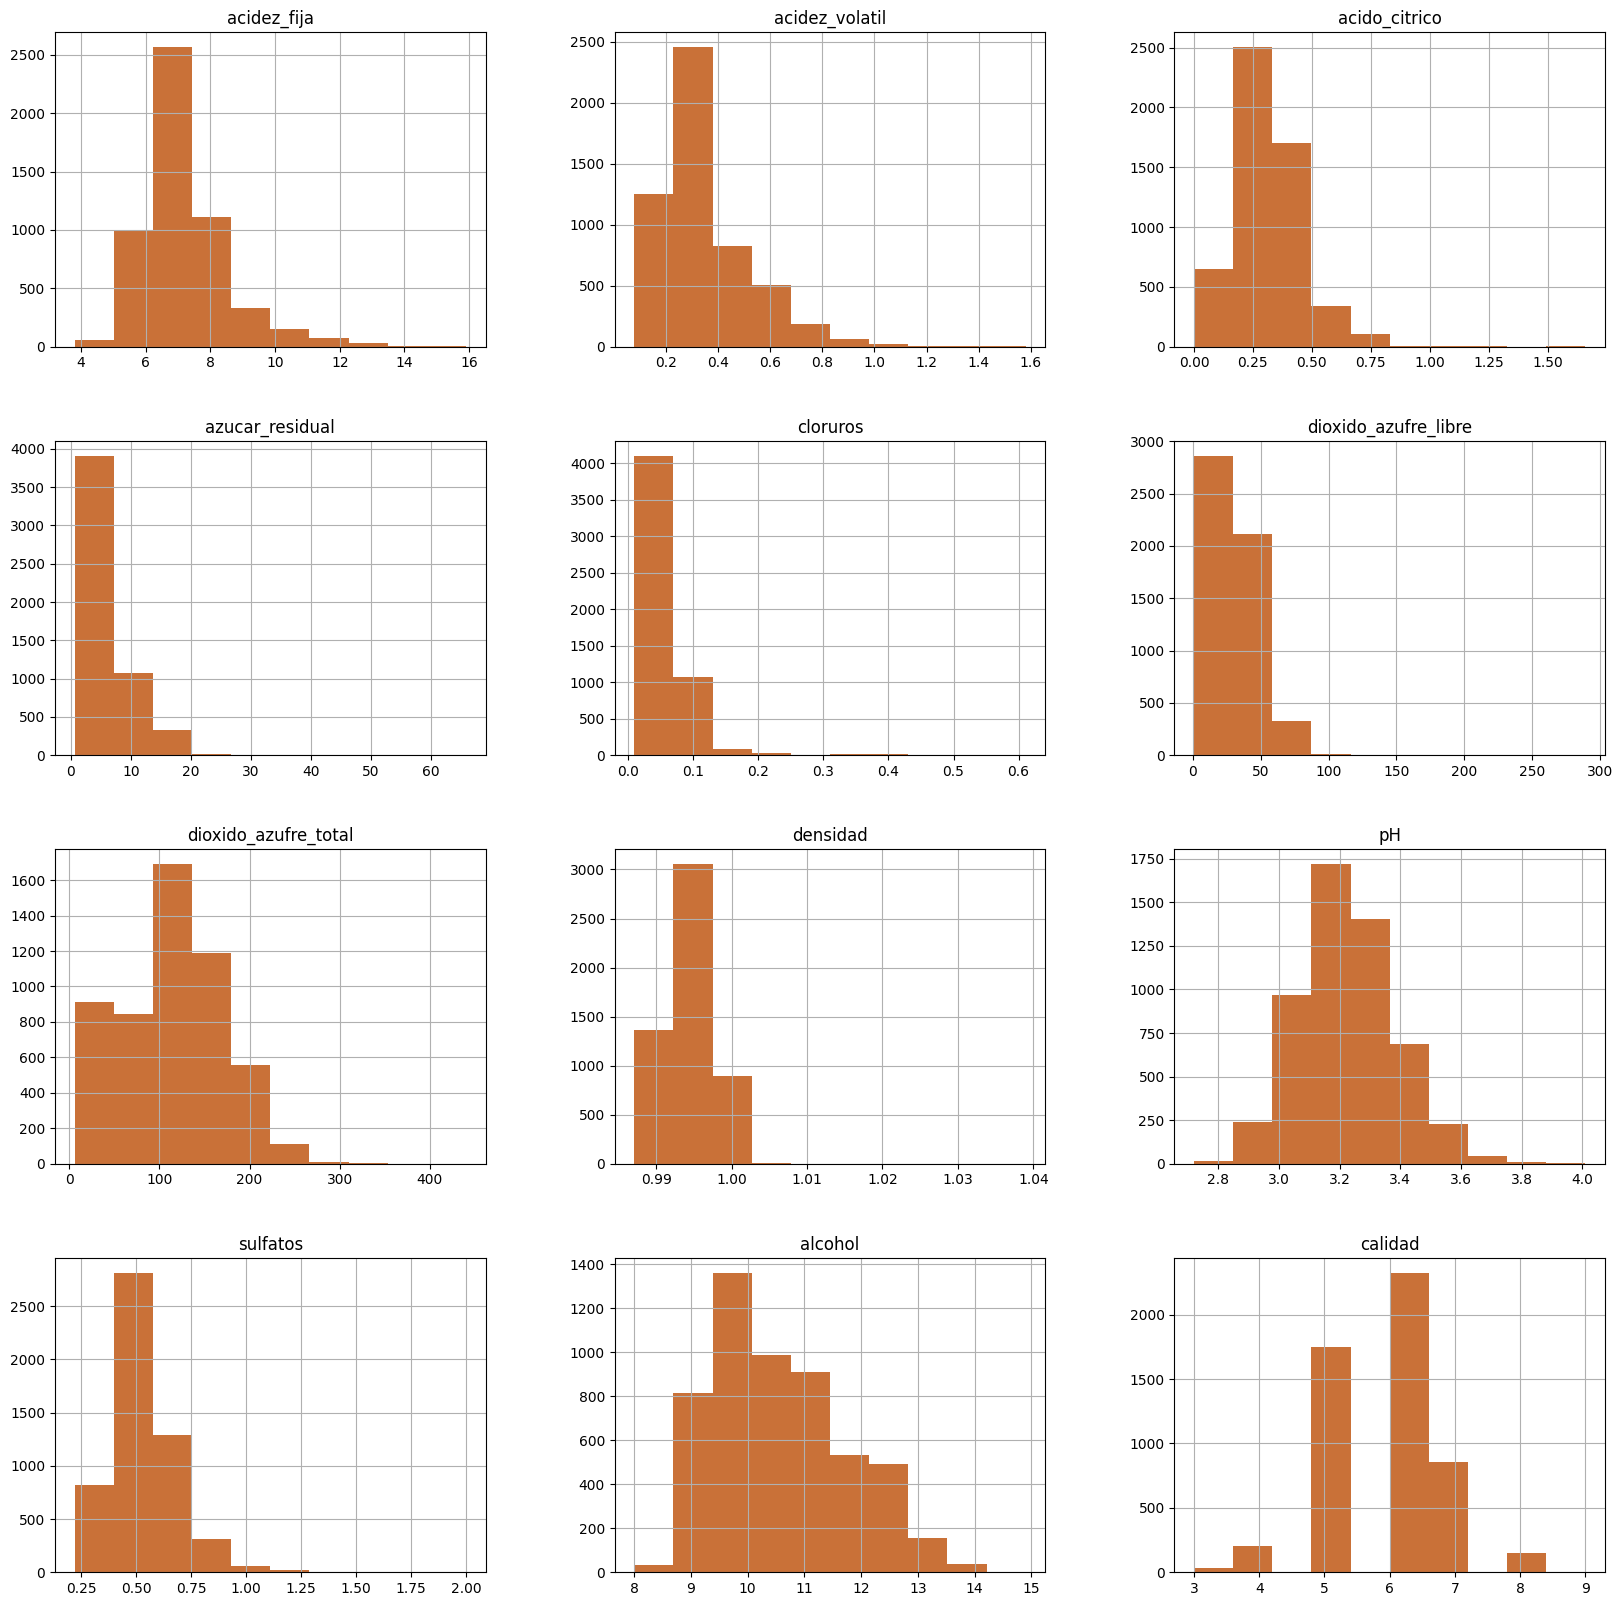

In [36]:
#Histogramas con respecto a cada una de las variables
df_vinos.hist(figsize=(20,20), color='#C97138')
plt.show()

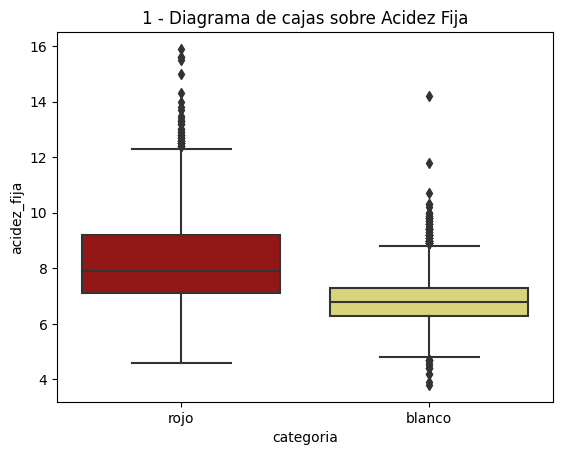

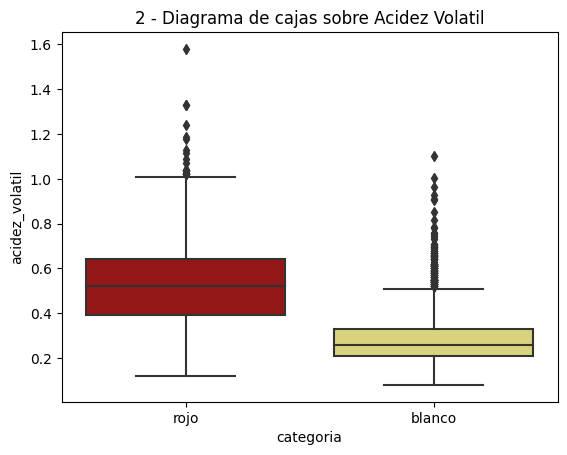

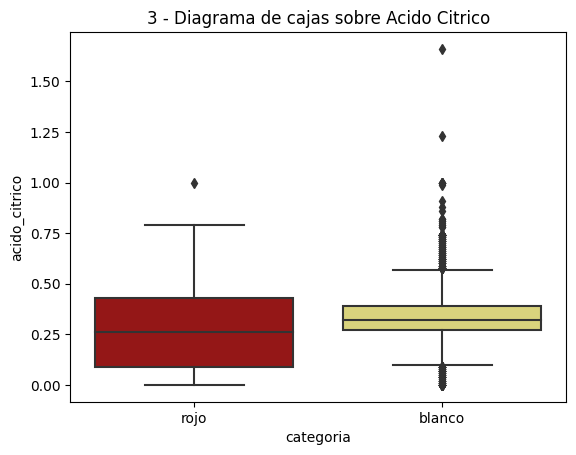

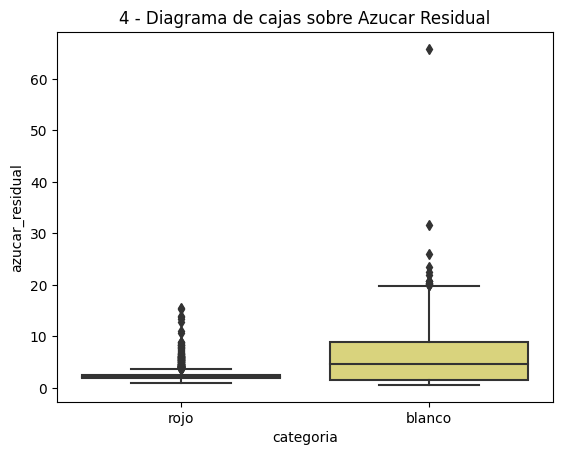

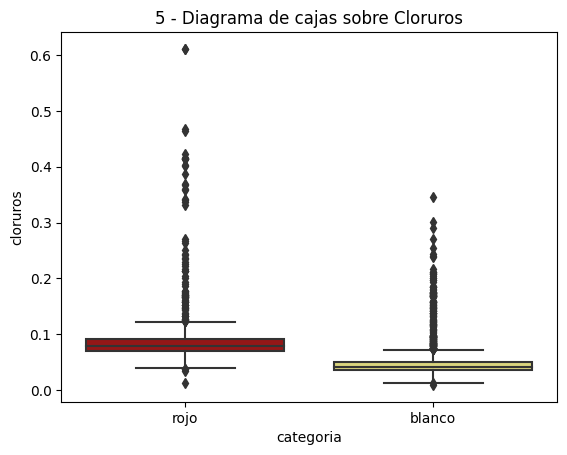

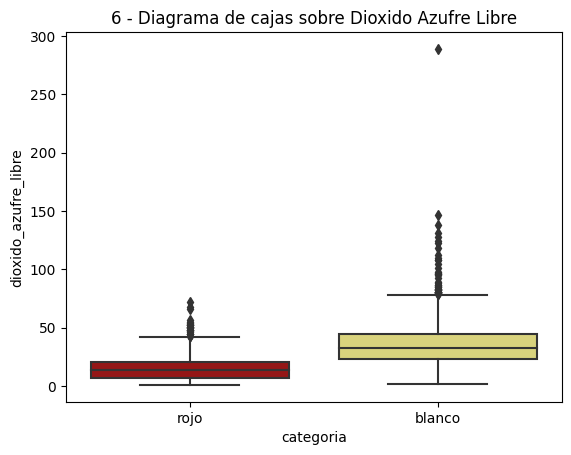

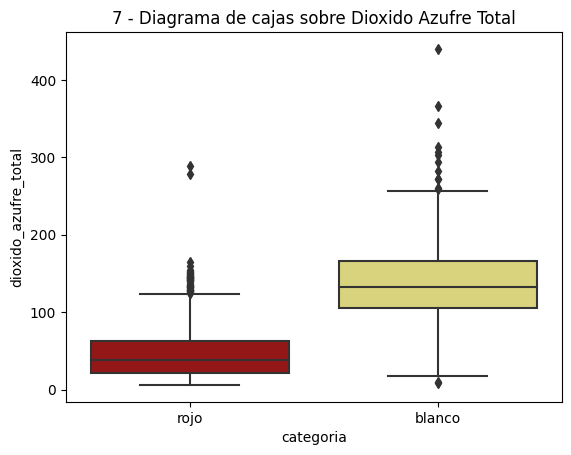

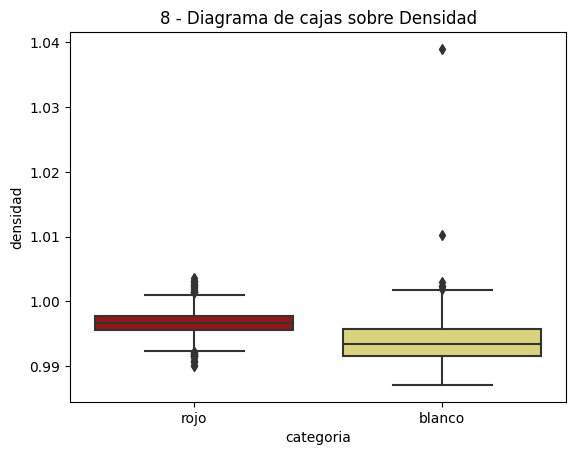

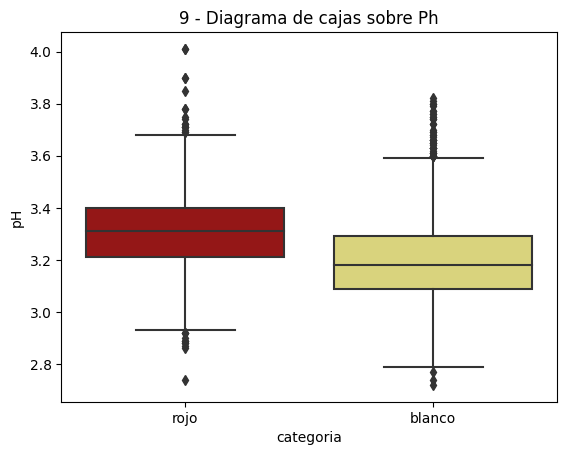

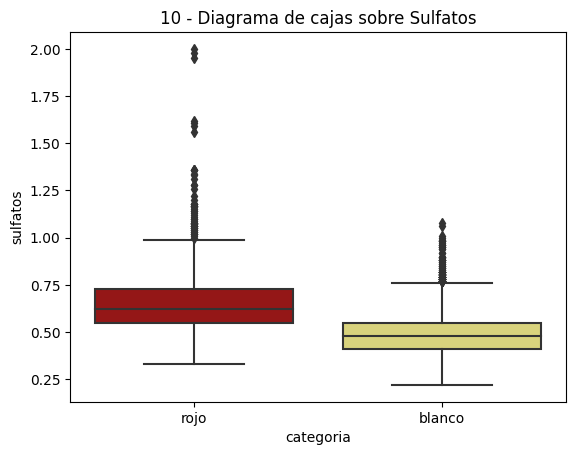

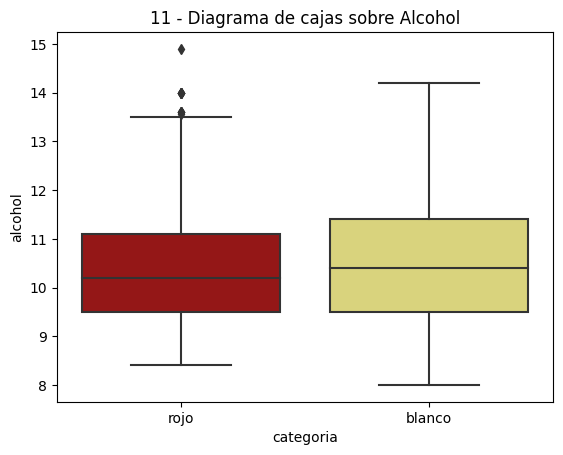

In [37]:
#Mostramos las distintas variables en relación a las categorias de vinos
columnas = list(df_vinos.columns.values)
for i in range(len(columnas)-2):
    titulo = (columnas[i].split('_'))
    grafico = sns.boxplot(df_vinos, x=columnas[12], y=columnas[i],palette=['#a90202', '#e8e06e'])
    if len(titulo) == 2:
        grafico.set_title(f'{i+1} - Diagrama de cajas sobre {titulo[0].capitalize()} {titulo[1].capitalize()}')
    elif len(titulo) == 3:
        grafico.set_title(f'{i+1} - Diagrama de cajas sobre {titulo[0].capitalize()} {titulo[1].capitalize()} {titulo[2].capitalize()}')
    else:
        grafico.set_title(f'{i+1} - Diagrama de cajas sobre {titulo[0].capitalize()}')
    plt.show()


In [38]:
#Revisamos la variable calidad para analizarla
calidad = df_vinos['calidad']
calidad

0       5
1       5
2       5
3       6
4       5
       ..
5315    6
5316    5
5317    6
5318    7
5319    6
Name: calidad, Length: 5320, dtype: int64

In [39]:
# Corroboramos las cantidades de registros segun la variable "calidad"
cantidad_por_calidad = df_vinos['calidad'].value_counts()
cantidad_por_calidad

calidad
6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: count, dtype: int64

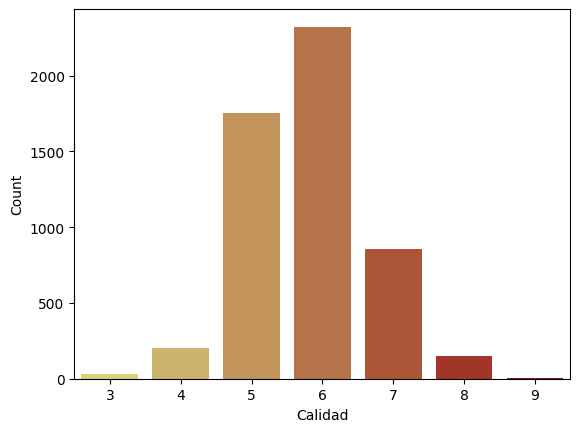

In [40]:
#Grafiicamos la anterior exploración
sns.countplot(data=df_vinos, x='calidad', palette="blend:#e8e06e,#a90202")
plt.xlabel('Calidad')
plt.ylabel('Count')
plt.show()

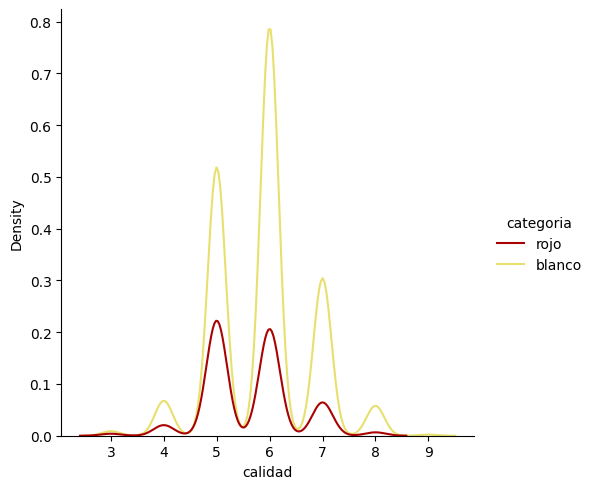

In [41]:
#Dividimos el analisis según la categoria
sns.displot(df_vinos, x="calidad", hue="categoria", kind="kde",palette=['#a90202', '#e8e06e'])
plt.show()

In [42]:
# matriz de correlacions
vinos_corr = df_vinos.filter(['acidez_fija',	'acidez_volatil',	'acido_citrico',	'azucar_residual',	'cloruros',	'dioxido_azufre_libre',	'dioxido_azufre_total',	'densidad','pH',	'sulfatos',	'alcohol',	'calidad']).corr()
vinos_corr

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad
acidez_fija,1.000000,0.214752,0.330328,-0.104439,0.288918,-0.281590,-0.327471,0.478180,-0.271182,0.304844,-0.102573,-0.080092
acidez_volatil,0.214752,1.000000,-0.384192,-0.163696,0.367626,-0.349039,-0.400716,0.308452,0.246687,0.227772,-0.065411,-0.265205
acido_citrico,0.330328,-0.384192,1.000000,0.146189,0.055199,0.130849,0.194835,0.094758,-0.344735,0.059183,-0.005496,0.097954
azucar_residual,-0.104439,-0.163696,0.146189,1.000000,-0.123094,0.398717,0.487519,0.520930,-0.234522,-0.174717,-0.305242,-0.056830
cloruros,0.288918,0.367626,0.055199,-0.123094,1.000000,-0.186615,-0.269817,0.371867,0.025823,0.405051,-0.269601,-0.202137
dioxido_azufre_libre,-0.281590,-0.349039,0.130849,0.398717,-0.186615,1.000000,0.720488,0.006166,-0.141747,-0.198244,-0.170012,0.054002
dioxido_azufre_total,-0.327471,-0.400716,0.194835,0.487519,-0.269817,0.720488,1.000000,0.006711,-0.222956,-0.275836,-0.249004,-0.050296
densidad,0.478180,0.308452,0.094758,0.520930,0.371867,0.006166,0.006711,1.000000,0.034273,0.282690,-0.667811,-0.326434
pH,-0.271182,0.246687,-0.344735,-0.234522,0.025823,-0.141747,-0.222956,0.034273,1.000000,0.168150,0.097314,0.039733
sulfatos,0.304844,0.227772,0.059183,-0.174717,0.405051,-0.198244,-0.275836,0.282690,0.168150,1.000000,-0.017232,0.041884


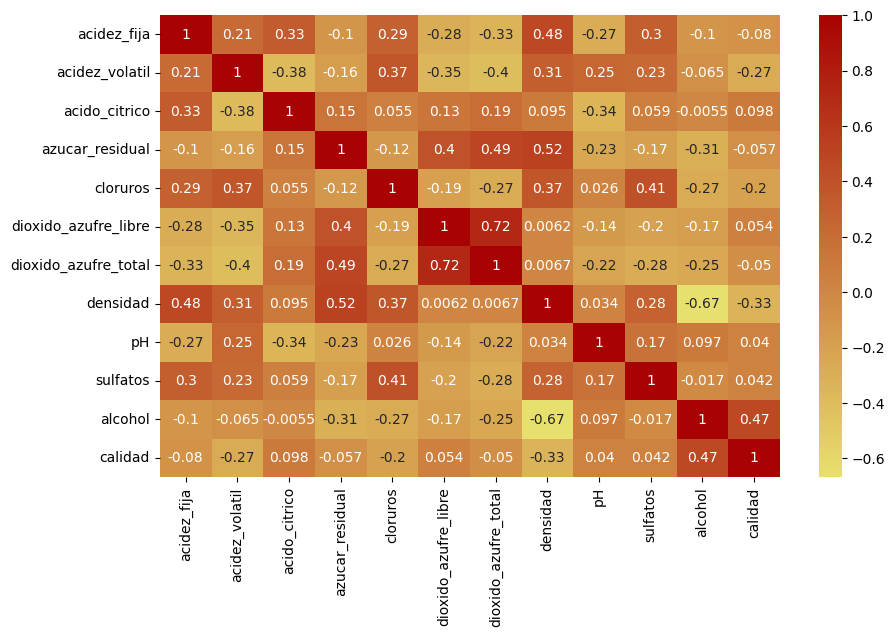

In [43]:
#Gráfico de correlaciones
plt.figure(figsize=(10,6))
sns.heatmap(vinos_corr, cmap=sns.color_palette("blend:#e8e06e,#a90202", as_cmap=True), annot=True)
plt.show()

# 3. Procesamiento y análisis de datos

Teniendo en cuenta la calidad, podemos definir las categorías de los vinos en 5 segmentos:
- Bajo
- Medio Bajo
- Medio
- Medio Alto
- Alto

Luego aplicamos la categorización y agregamos una nueva columna al dataframe.

In [44]:
df_vinos['categoria_calidad'] = df_vinos['calidad'].apply(lambda x: 'Bajo' if x <= 4 else 'Medio Bajo' if x == 5  else 'Medio' if x==6 else 'Medio Alto' if x== 7 else 'Alto')
df_vinos.head()

,acidez_fija,acidez_volatil,acido_citrico,azucar_residual,cloruros,dioxido_azufre_libre,dioxido_azufre_total,densidad,pH,sulfatos,alcohol,calidad,categoria,categoria_calidad
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,rojo,Medio Bajo
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,rojo,Medio Bajo
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,rojo,Medio Bajo
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,rojo,Medio
4,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,rojo,Medio Bajo


In [45]:
df_vinos.describe(include='object')

,categoria,categoria_calidad
count,5320,5320
unique,2,5
top,blanco,Medio
freq,3961,2323


### • Tratamiento de outliers

In [46]:
#METODO IQR

columns_of_interest = df_vinos.columns.drop(['categoria', 'categoria_calidad'])
print(columns_of_interest)
print('')

# Calcular los límites del rango intercuartílico (IQR) para cada columna
Q1 = df_vinos[columns_of_interest].quantile(0.25)
Q3 = df_vinos[columns_of_interest].quantile(0.75)
IQR = Q3 - Q1

# Detectar outliers usando el criterio del IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Obtener los outliers en cada columna
outliers = ((df_vinos[columns_of_interest] < lower_bound) | (df_vinos[columns_of_interest] > upper_bound)).any(axis=1)

# Imprimir los registros con outliers
print(df_vinos[outliers])

Index(['acidez_fija', 'acidez_volatil', 'acido_citrico', 'azucar_residual',
       'cloruros', 'dioxido_azufre_libre', 'dioxido_azufre_total', 'densidad',
       'pH', 'sulfatos', 'alcohol', 'calidad'],
      dtype='object')

      acidez_fija  acidez_volatil  acido_citrico  azucar_residual  cloruros  \
0             7.4            0.70           0.00              1.9     0.076   
1             7.8            0.88           0.00              2.6     0.098   
2             7.8            0.76           0.04              2.3     0.092   
3            11.2            0.28           0.56              1.9     0.075   
11            7.8            0.61           0.29              1.6     0.114   
...           ...             ...            ...              ...       ...   
5248          6.0            0.27           0.40              1.7     0.021   
5267          5.7            0.22           0.25              1.1     0.050   
5271          6.6            0.38           0.29              2

In [47]:
# Filtrar los registros sin outliers
df_vinos_filtered = df_vinos[~outliers]

# Imprimir el DataFrame filtrado
print(df_vinos_filtered)

      acidez_fija  acidez_volatil  acido_citrico  azucar_residual  cloruros  \
4             7.4            0.66           0.00              1.8     0.075   
5             7.9            0.60           0.06              1.6     0.069   
6             7.3            0.65           0.00              1.2     0.065   
7             7.8            0.58           0.02              2.0     0.073   
8             7.5            0.50           0.36              6.1     0.071   
...           ...             ...            ...              ...       ...   
5315          6.2            0.21           0.29              1.6     0.039   
5316          6.6            0.32           0.36              8.0     0.047   
5317          6.5            0.24           0.19              1.2     0.041   
5318          5.5            0.29           0.30              1.1     0.022   
5319          6.0            0.21           0.38              0.8     0.020   

      dioxido_azufre_libre  dioxido_azufre_total  d

### • Comparación de cantidad de registros con y sin filtrar outliers

In [48]:
df_vinos.describe(include='object')


,categoria,categoria_calidad
count,5320,5320
unique,2,5
top,blanco,Medio
freq,3961,2323


In [49]:
df_vinos_filtered.describe(include='object')

,categoria,categoria_calidad
count,4081,4081
unique,2,4
top,blanco,Medio
freq,3384,1902


In [50]:
#Corroboramos que categorias de calidades quedaron
for i in range(len(df_vinos_filtered['categoria_calidad'].unique())):
    print(df_vinos_filtered['categoria_calidad'].unique()[i])

Medio Bajo
Medio Alto
Bajo
Medio


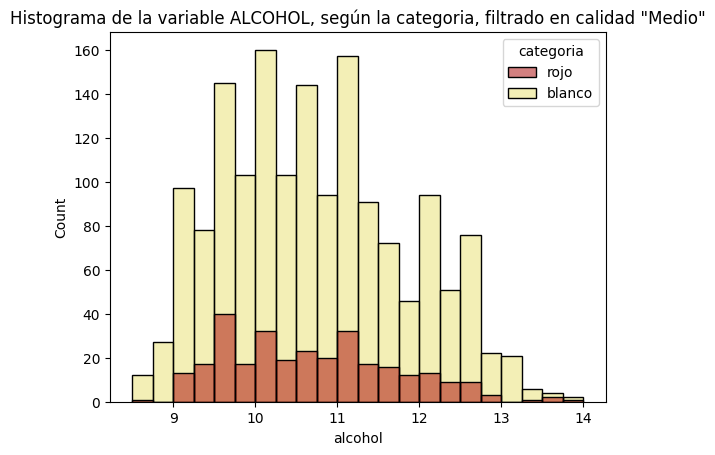

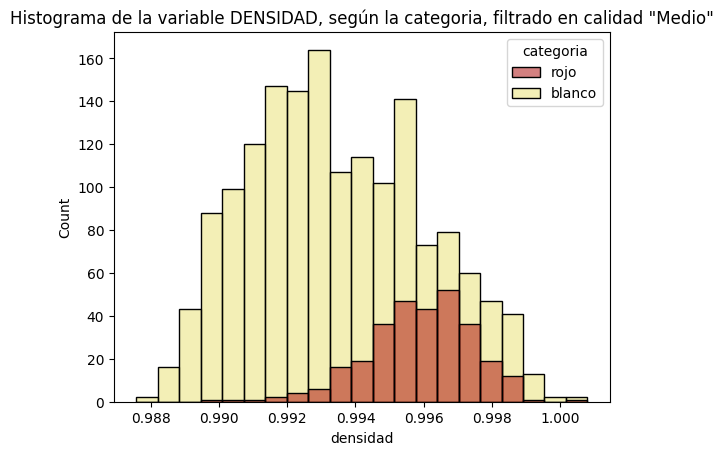

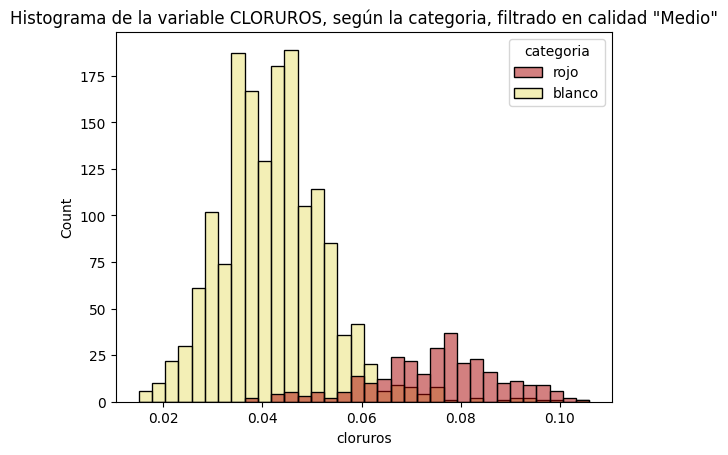

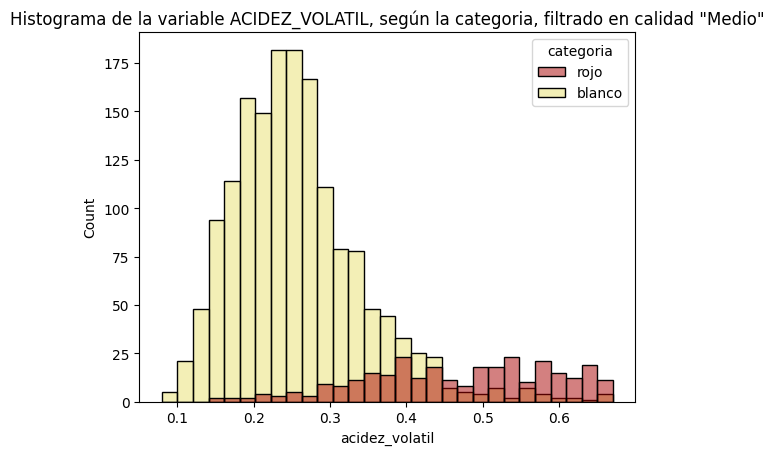

In [51]:
# Histograma alcohol, densidad, cloruros, acidez volatil sobre la categoria de calidad TOP: "Medio"
variables_analizadas = ['alcohol','densidad','cloruros','acidez_volatil']
for i in range(len(variables_analizadas)):
    grafico = sns.histplot(df_vinos_filtered[df_vinos_filtered['categoria_calidad'] == 'Medio'], x=variables_analizadas[i], hue='categoria',palette=['#a90202', '#e8e06e'])
    grafico.set_title(f'Histograma de la variable {variables_analizadas[i].upper()}, según la categoria, filtrado en calidad "Medio"')
    plt.show()


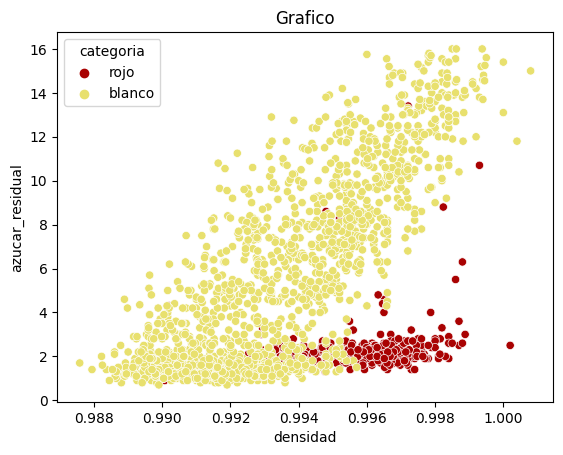

In [52]:
grafico = sns.scatterplot(df_vinos_filtered[df_vinos_filtered['categoria_calidad'] == 'Medio'], x='densidad', y='azucar_residual', hue='categoria',palette=['#a90202', '#e8e06e'])
grafico.set_title('Grafico')
plt.show()

### • Comparaciones de las medias entre categoria de vinos

In [53]:
# Add Start Section Diego Ormeño & Romina Ulerich


In [54]:
# Calculamos de cada df el promedio de cada campo
def_tinto = df_vinos_filtered[df_vinos_filtered['categoria'] == 'rojo'].mean( numeric_only=True  )
def_blanco = df_vinos_filtered[df_vinos_filtered['categoria'] == 'blanco'].mean( numeric_only=True  )


In [55]:
# imprimimos en pantalla los datos 
def_tinto

acidez_fija              7.621951
acidez_volatil           0.483680
acido_citrico            0.232568
azucar_residual          2.397489
cloruros                 0.076085
dioxido_azufre_libre    16.855811
dioxido_azufre_total    49.309182
densidad                 0.996159
pH                       3.342712
sulfatos                 0.616557
alcohol                 10.402463
calidad                  5.625538
dtype: float64

In [56]:
# imprimimos en pantalla los datos 
def_blanco

acidez_fija               6.825739
acidez_volatil            0.275471
acido_citrico             0.321832
azucar_residual           5.460638
cloruros                  0.042853
dioxido_azufre_libre     33.746602
dioxido_azufre_total    134.960106
densidad                  0.993552
pH                        3.197367
sulfatos                  0.486587
alcohol                  10.630175
calidad                   5.825946
dtype: float64

In [57]:
# Generamos un nuevo df llamado 'resultado' donde tendremos 2 columnas representado cada tipo de vino
resultado = pd.concat([def_blanco, def_tinto], axis=1)

In [58]:
# Renombramos los title de cada columna
resultado = resultado.rename(columns={0: 'Blanco', 1: 'Tinto'})

In [59]:
# Imprimo en pantalla el df resultante
resultado

,Blanco,Tinto
acidez_fija,6.825739,7.621951
acidez_volatil,0.275471,0.483680
acido_citrico,0.321832,0.232568
azucar_residual,5.460638,2.397489
cloruros,0.042853,0.076085
dioxido_azufre_libre,33.746602,16.855811
dioxido_azufre_total,134.960106,49.309182
densidad,0.993552,0.996159
pH,3.197367,3.342712
sulfatos,0.486587,0.616557


# 4. Visualización de datos

### • Correlaciones de variables con outliers

 <img src="image/grafico_dispersion_outliers.png" alt="Mapa de disperción" style=" border-radius: 10px;">

### • Correlaciones de variables sin outliers

 <img src="image/grafico_dispersion_sin_outliers.png" alt="Mapa de disperción" style=" border-radius: 10px;">

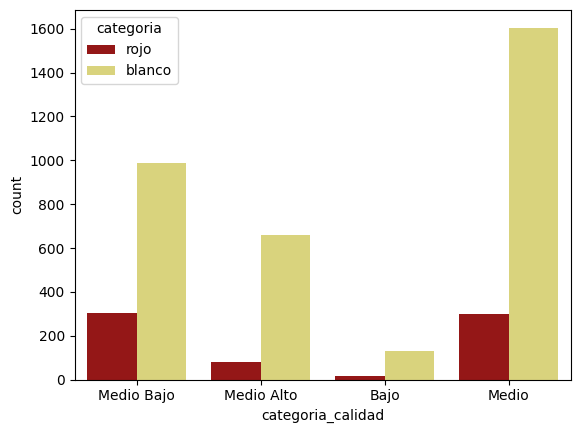

In [60]:
# Comparación por calidad entre vino rojo y blanco
sns.countplot(df_vinos_filtered, x='categoria_calidad', hue='categoria',palette=['#a90202', '#e8e06e'])
plt.show()

In [61]:
# Correlación de la calidad del vino con respecto a las otras variables.
correlation_quality = df_vinos_filtered[columns_of_interest].corr()['calidad'].sort_values(ascending=False)
print(correlation_quality)

calidad                 1.000000
alcohol                 0.453872
acido_citrico           0.102150
dioxido_azufre_libre    0.074745
sulfatos                0.059069
pH                      0.052871
azucar_residual        -0.056042
dioxido_azufre_total   -0.068406
acidez_fija            -0.094186
acidez_volatil         -0.230552
cloruros               -0.261744
densidad               -0.333244
Name: calidad, dtype: float64


# 5. Comunicación efectiva de resultados